In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.



In [2]:
df = w.get_zillow_data()

In [3]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
#Combine all the step below into one big function
df = w.prepare_zillow(df)

In [7]:
#df = w.handle_missing_values(df, prop_required_row=0.75)

In [5]:
df.head()

,propertylandusetypeid,parcel_id,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fullbathcnt,latitude,...,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,county,los_angeles,orange,ventura,bathsandbeds
0,261.0,14297519,1727539,3.5,4.0,3.5,3100.0,3100.0,3.0,33634931.0,...,0.5,119.300710,0.5,0.875000,0,orange,0,1,0,7.5
1,261.0,17052889,1387261,1.0,2.0,1.0,1465.0,1465.0,1.0,34449266.0,...,0.2,29.730371,0.3,0.500000,0,ventura,0,0,1,3.0
2,261.0,14186244,11677,2.0,3.0,2.0,1243.0,1243.0,2.0,33886168.0,...,0.2,56.865394,0.4,0.666667,0,orange,0,1,0,5.0
3,261.0,12177905,2288172,3.0,4.0,3.0,2376.0,2376.0,3.0,34245180.0,...,0.1,2.778417,0.1,0.750000,0,los_angeles,1,0,0,7.0
6,261.0,12095076,781532,3.0,4.0,3.0,2962.0,2962.0,3.0,34145202.0,...,0.3,7.882841,0.2,0.750000,0,los_angeles,1,0,0,7.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49727 entries, 0 to 77574
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       49727 non-null  float64
 1   parcel_id                   49727 non-null  int64  
 2   id                          49727 non-null  int64  
 3   baths                       49727 non-null  float64
 4   beds                        49727 non-null  float64
 5   calculatedbathnbr           49713 non-null  float64
 6   sqft                        49727 non-null  float64
 7   finishedsquarefeet12        49546 non-null  float64
 8   fullbathcnt                 49713 non-null  float64
 9   latitude                    49727 non-null  float64
 10  longitude                   49727 non-null  float64
 11  lotsizesquarefeet           49727 non-null  float64
 12  propertycountylandusecode   49727 non-null  object 
 13  rawcensustractandblock      497

In [10]:
#using only single units/or at least trying to
'''
df = df[(df.propertylandusedesc == 'Single Family Residential') |
          (df.propertylandusedesc == 'Mobile Home') |
          (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes') |
          (df.propertylandusedesc == 'Townhouse')]
'''

In [11]:
#df = w.remove_outliers(df, 1.5,['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt'])

In [12]:
#df = df.drop(columns=['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc'])

In [7]:
train, validate, test = w.train_validate_test_split(df, 'logerror', seed=1349)

In [10]:
#return our train, validate, and test sets with calculatedbathnbr, fullbathcnt, regionidcity, regionidzip,censustractandblock
#imputed with most frequent values
col_list=['calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'censustractandblock']
train, validate, test = w.impute_nulls(train, validate, test, strategy='most_frequent', col_list = col_list)

In [12]:
#return our train, validate, and test sets with finishedsquarefeet12, lotsizesquarefeet, structuretaxvaluedollarcnt, 
#tax_value, land tax value dollar count, and tax amount imputed with the column's median value. 
col_list=['finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 
                                  'tax_value', 'landtaxvaluedollarcnt', 'tax_amount']
train, validate, test = w.impute_nulls(train, validate, test, strategy='median', col_list = col_list)

In [22]:
#tax_value, land tax value dollar count, and tax amount imputed with the column's median value. 
#train,validate, test = w.impute_nulls(train,validate,test, 'median', col_list=['finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])


In [13]:
#Quite alot of nulls
train.isna().sum()

propertylandusetypeid          0
parcel_id                      0
id                             0
baths                          0
beds                           0
calculatedbathnbr              0
sqft                           0
finishedsquarefeet12           0
fullbathcnt                    0
latitude                       0
longitude                      0
lotsizesquarefeet              0
propertycountylandusecode      0
rawcensustractandblock         0
regionidcity                   0
regionidzip                    0
roomcnt                        0
year_built                     0
structuretaxvaluedollarcnt     0
tax_value                      0
assessmentyear                 0
landtaxvaluedollarcnt          0
tax_amount                     0
censustractandblock            0
logerror                       0
transactiondate                0
propertylandusedesc            0
LA                             0
Orange                         0
Ventura                        0
age       

In [14]:
#drop rows with remaining nulls from all of our split sets
train = train.dropna()
validate = validate.dropna()
test = test.dropna()

In [15]:
train.isna().sum()

propertylandusetypeid         0
parcel_id                     0
id                            0
baths                         0
beds                          0
calculatedbathnbr             0
sqft                          0
finishedsquarefeet12          0
fullbathcnt                   0
latitude                      0
longitude                     0
lotsizesquarefeet             0
propertycountylandusecode     0
rawcensustractandblock        0
regionidcity                  0
regionidzip                   0
roomcnt                       0
year_built                    0
structuretaxvaluedollarcnt    0
tax_value                     0
assessmentyear                0
landtaxvaluedollarcnt         0
tax_amount                    0
censustractandblock           0
logerror                      0
transactiondate               0
propertylandusedesc           0
LA                            0
Orange                        0
Ventura                       0
age                           0
age_bin 

1.) Log error is affected by square footage, number of bedrooms and bathrooms.

2.) Log error is affected by property age

3.) Log error is affected by location

4.) Log error is affected by price per sq ft.

5.) Log error is affected by combinations of internal property features and combinations of locational features.

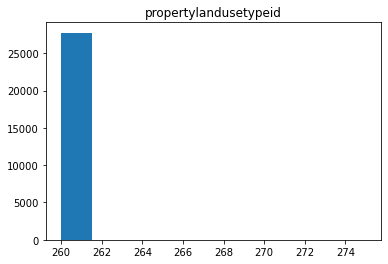

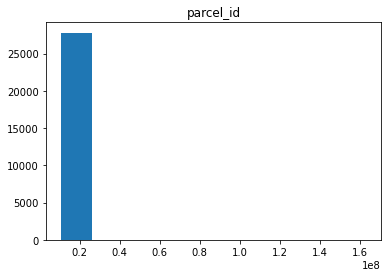

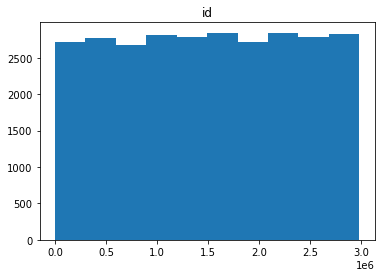

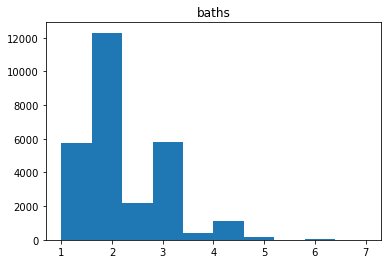

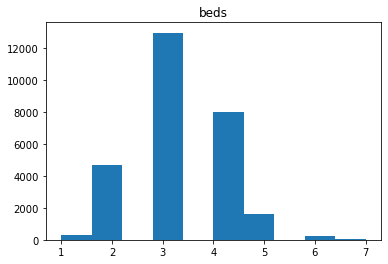

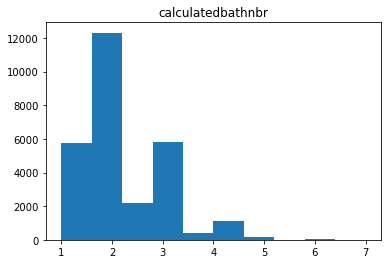

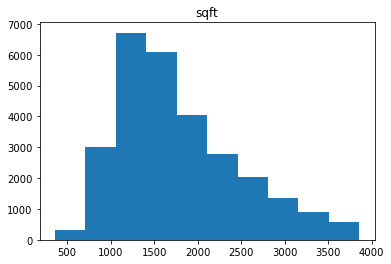

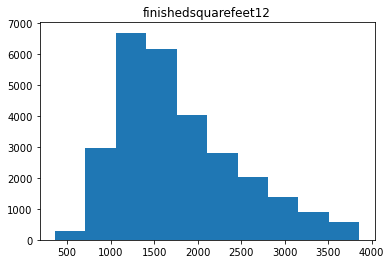

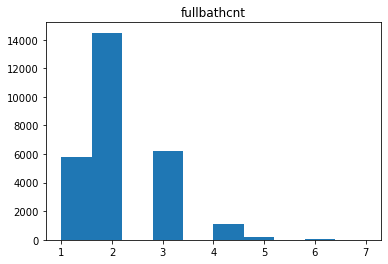

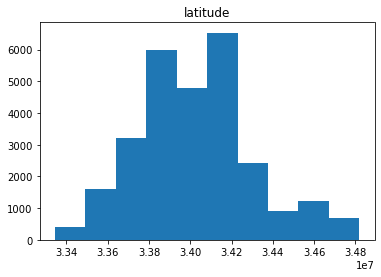

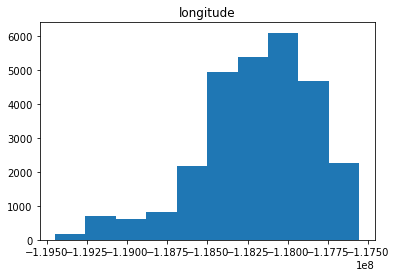

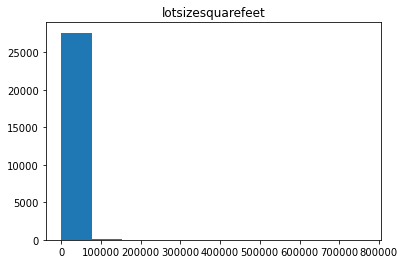

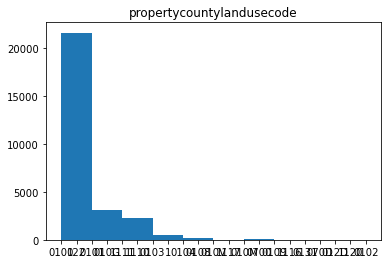

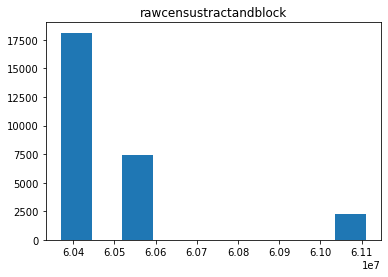

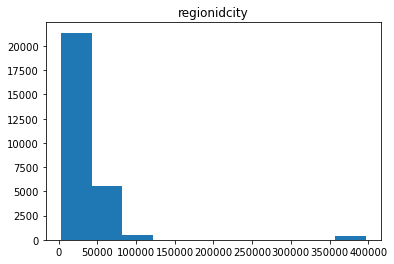

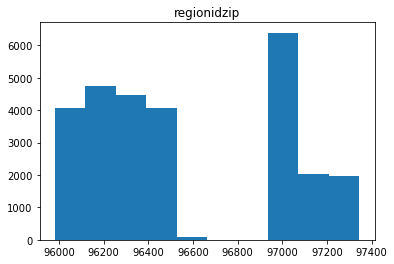

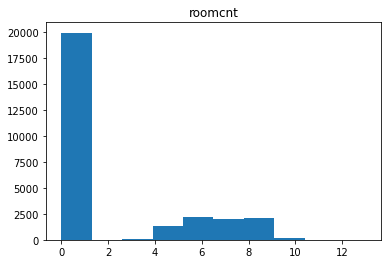

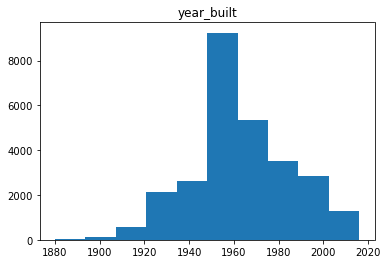

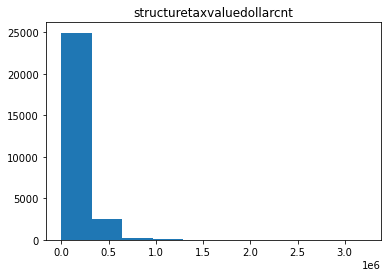

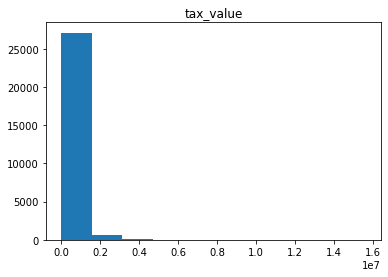

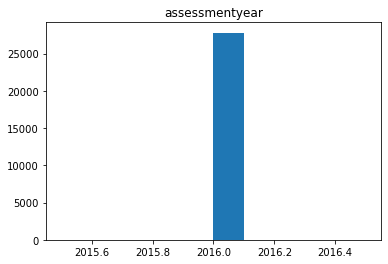

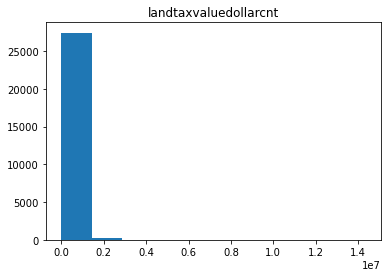

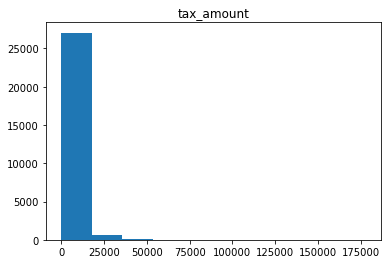

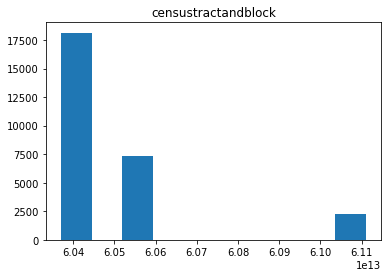

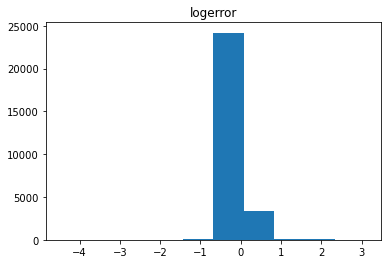

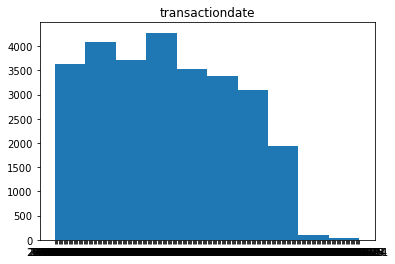

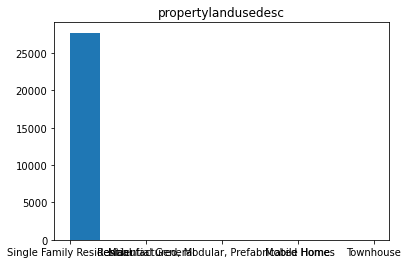

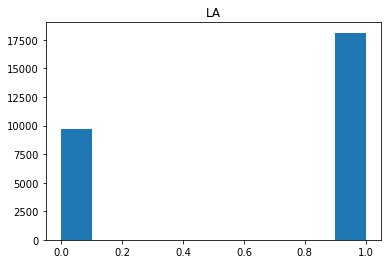

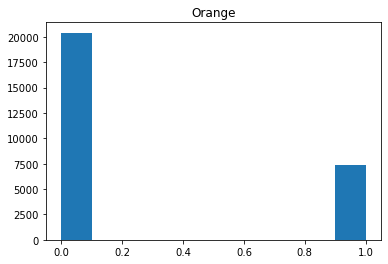

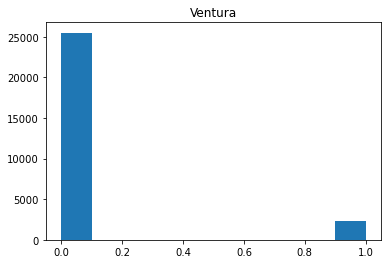

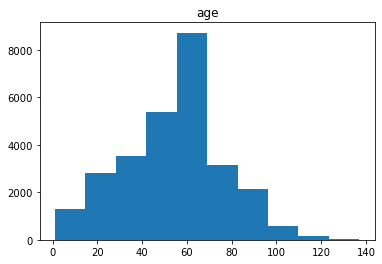

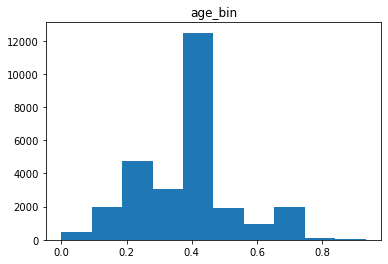

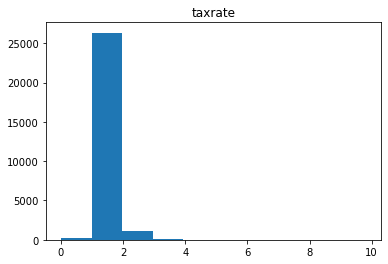

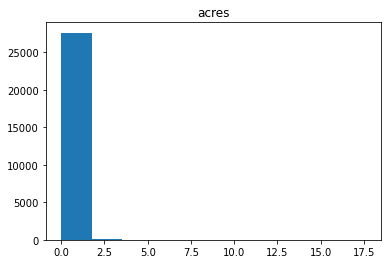

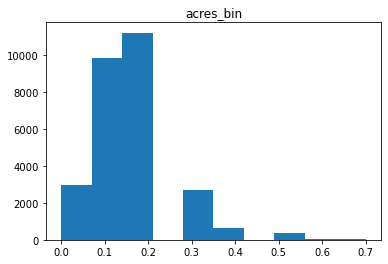

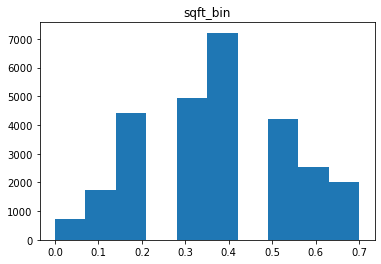

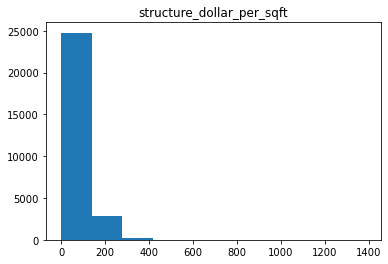

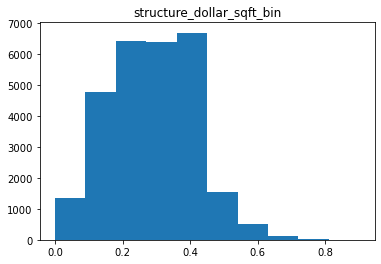

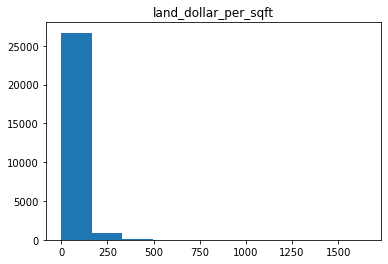

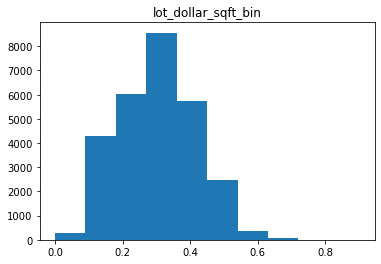

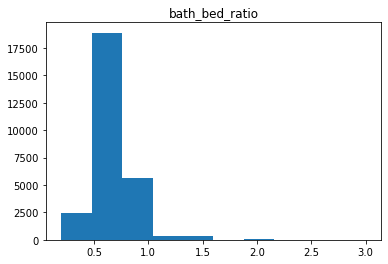

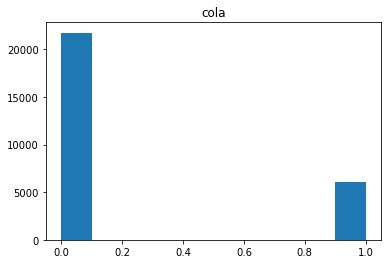

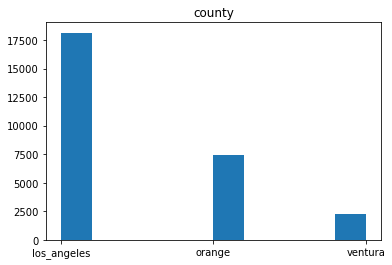

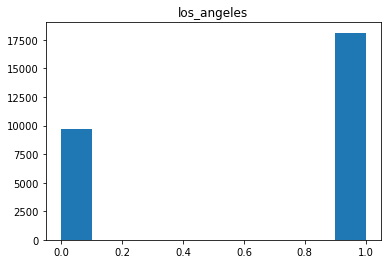

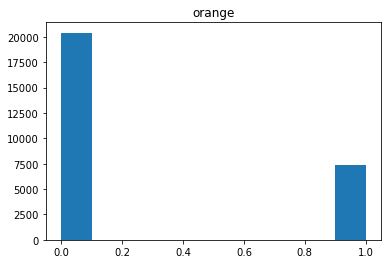

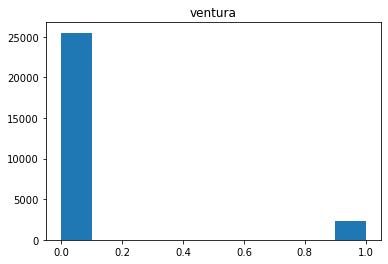

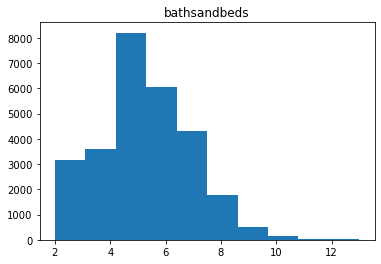

In [16]:
#univariate exploration
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [17]:
def explore_univariate(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks, and turns off gridlines.
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=variable, data=df)
    plt.xlabel('')
    plt.title('Box Plot', fontsize=30)
    
    # distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, element='step', kde=True, color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Distribution', fontsize=30)
    
    #title
    plt.suptitle(f'{variable}', fontsize = 45)
    plt.tight_layout()
    plt.show()
# functions to create clusters and scatter-plot:

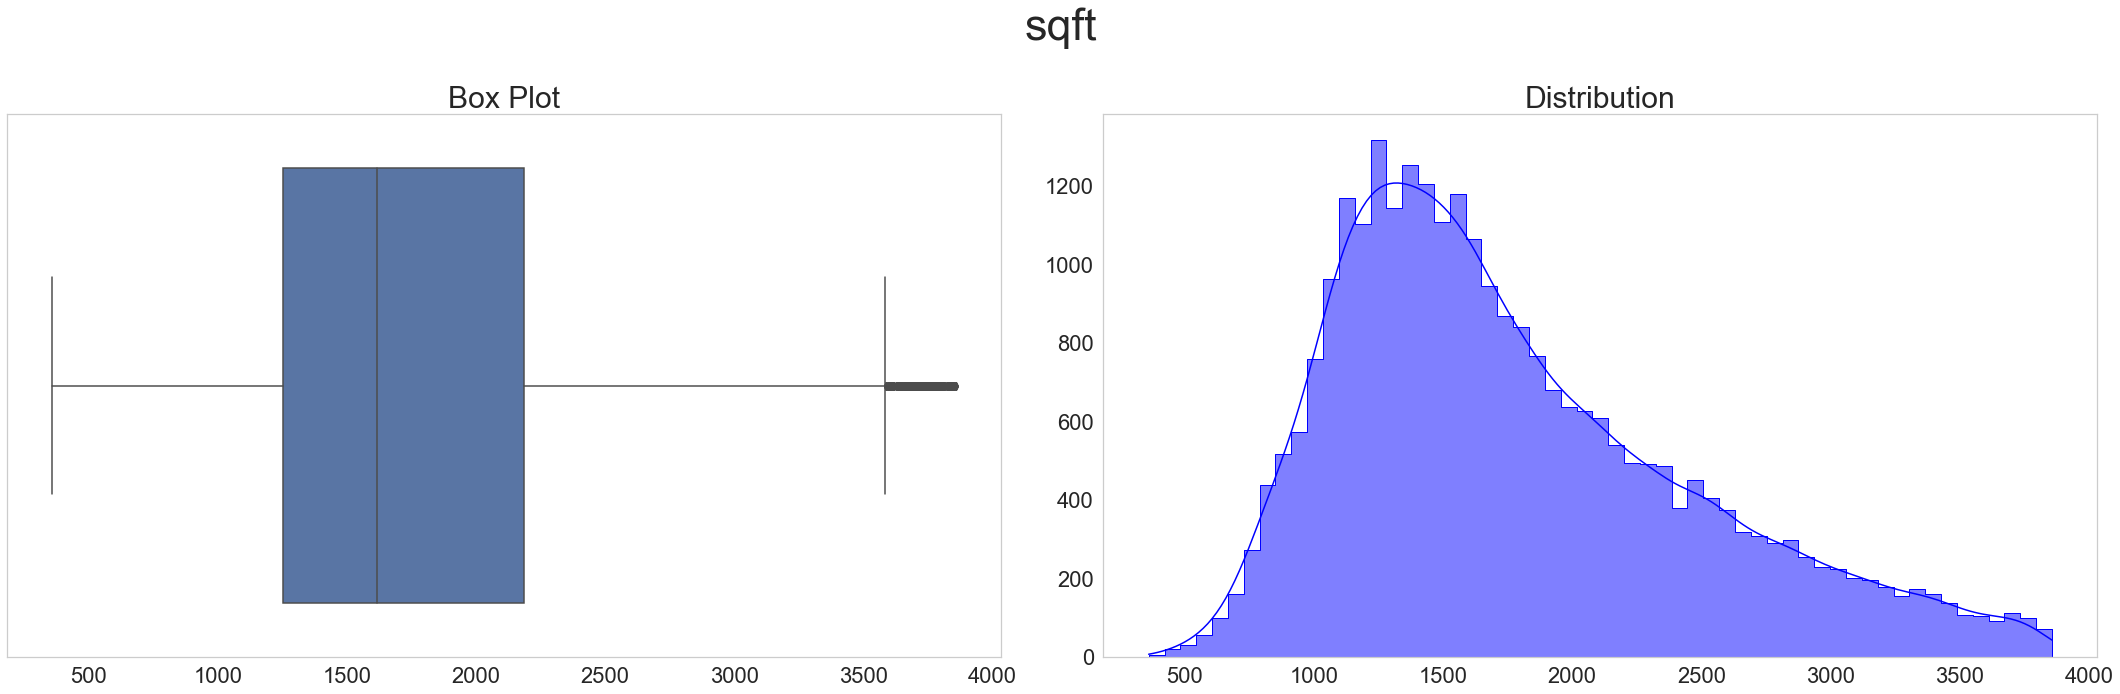

Summary Statistics for sqft
count    27798.000000
mean      1777.331750
std        695.137575
min        360.000000
25%       1253.000000
50%       1617.000000
75%       2186.000000
max       3857.000000
Name: sqft, dtype: float64


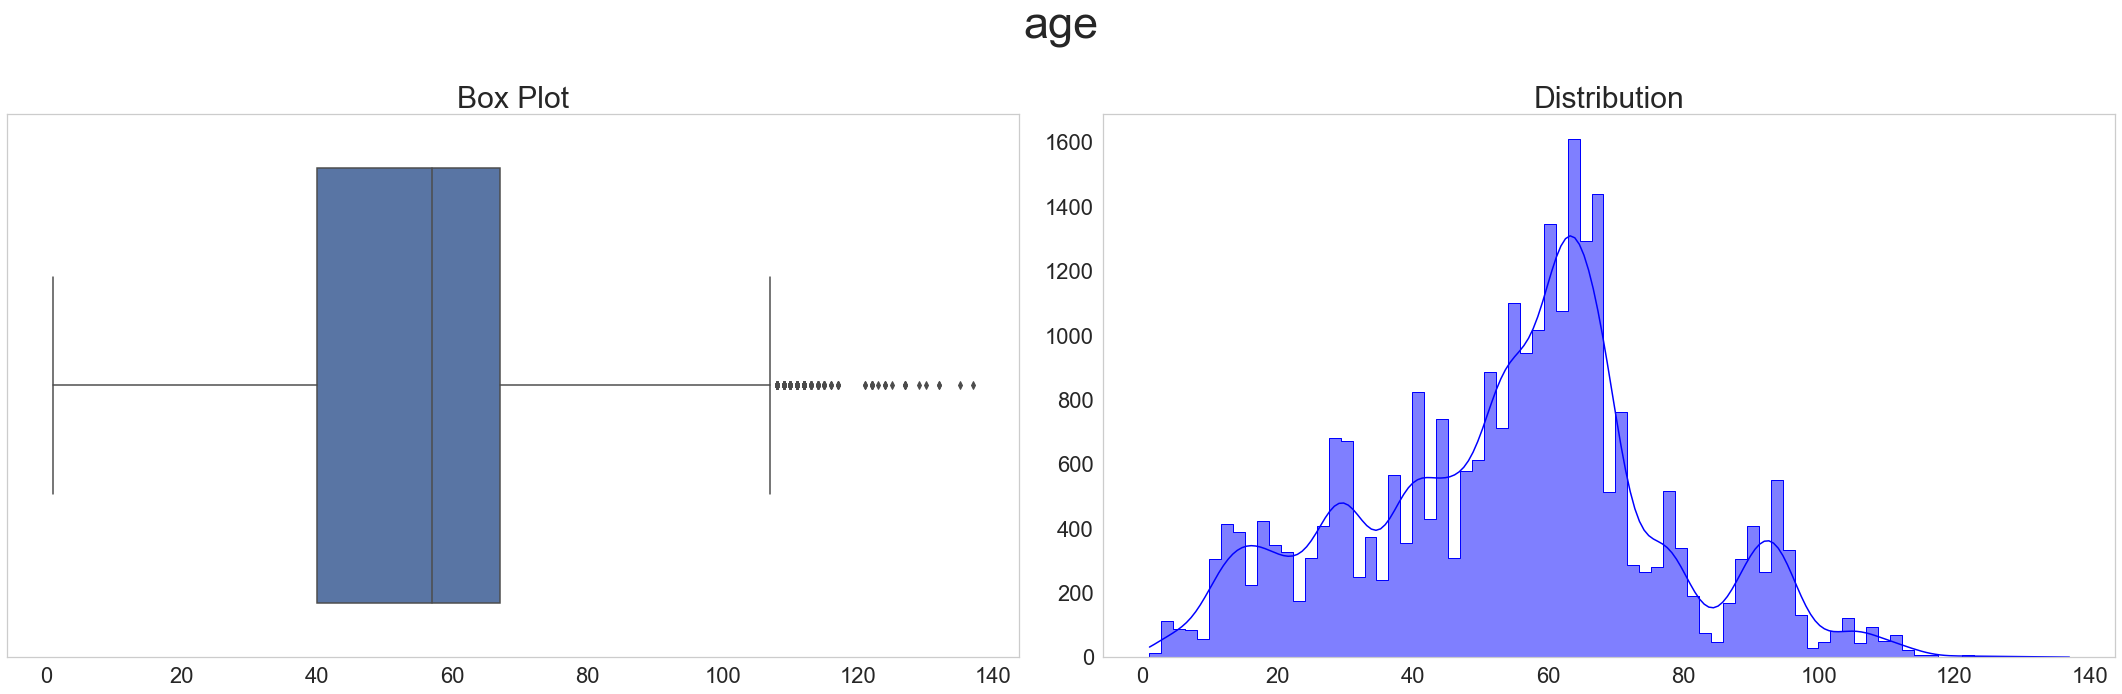

Summary Statistics for age
count    27798.000000
mean        54.711922
std         22.348823
min          1.000000
25%         40.000000
50%         57.000000
75%         67.000000
max        137.000000
Name: age, dtype: float64


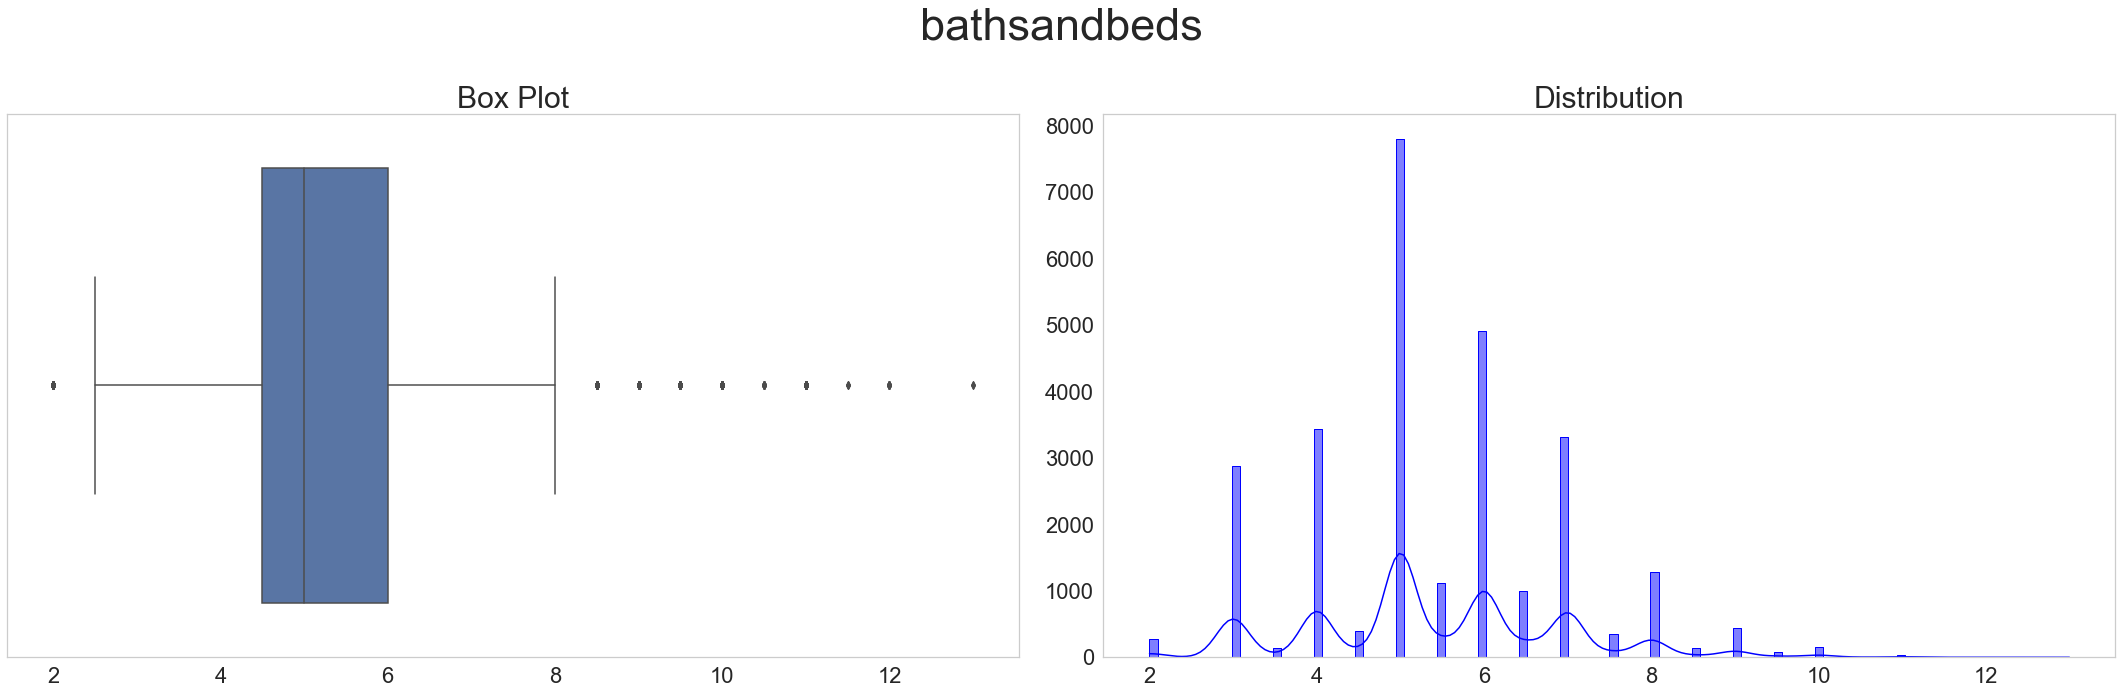

Summary Statistics for bathsandbeds
count    27798.000000
mean         5.421037
std          1.519852
min          2.000000
25%          4.500000
50%          5.000000
75%          6.000000
max         13.000000
Name: bathsandbeds, dtype: float64


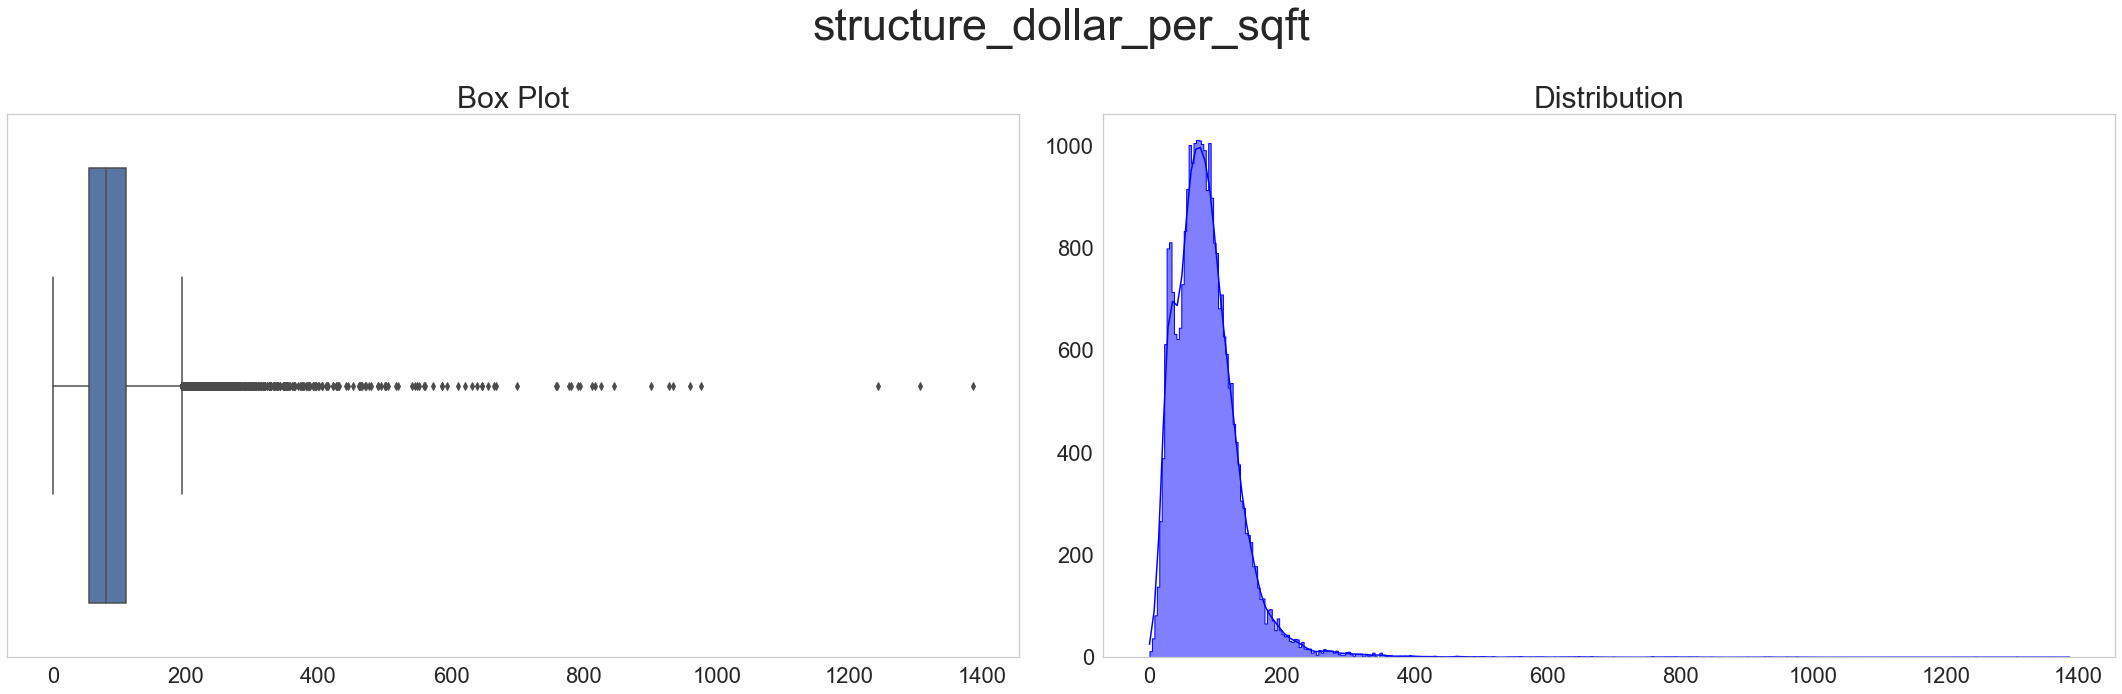

Summary Statistics for structure_dollar_per_sqft
count    27798.000000
mean        87.156388
std         54.826008
min          0.258741
25%         53.913315
50%         80.099439
75%        109.801895
max       1386.370588
Name: structure_dollar_per_sqft, dtype: float64


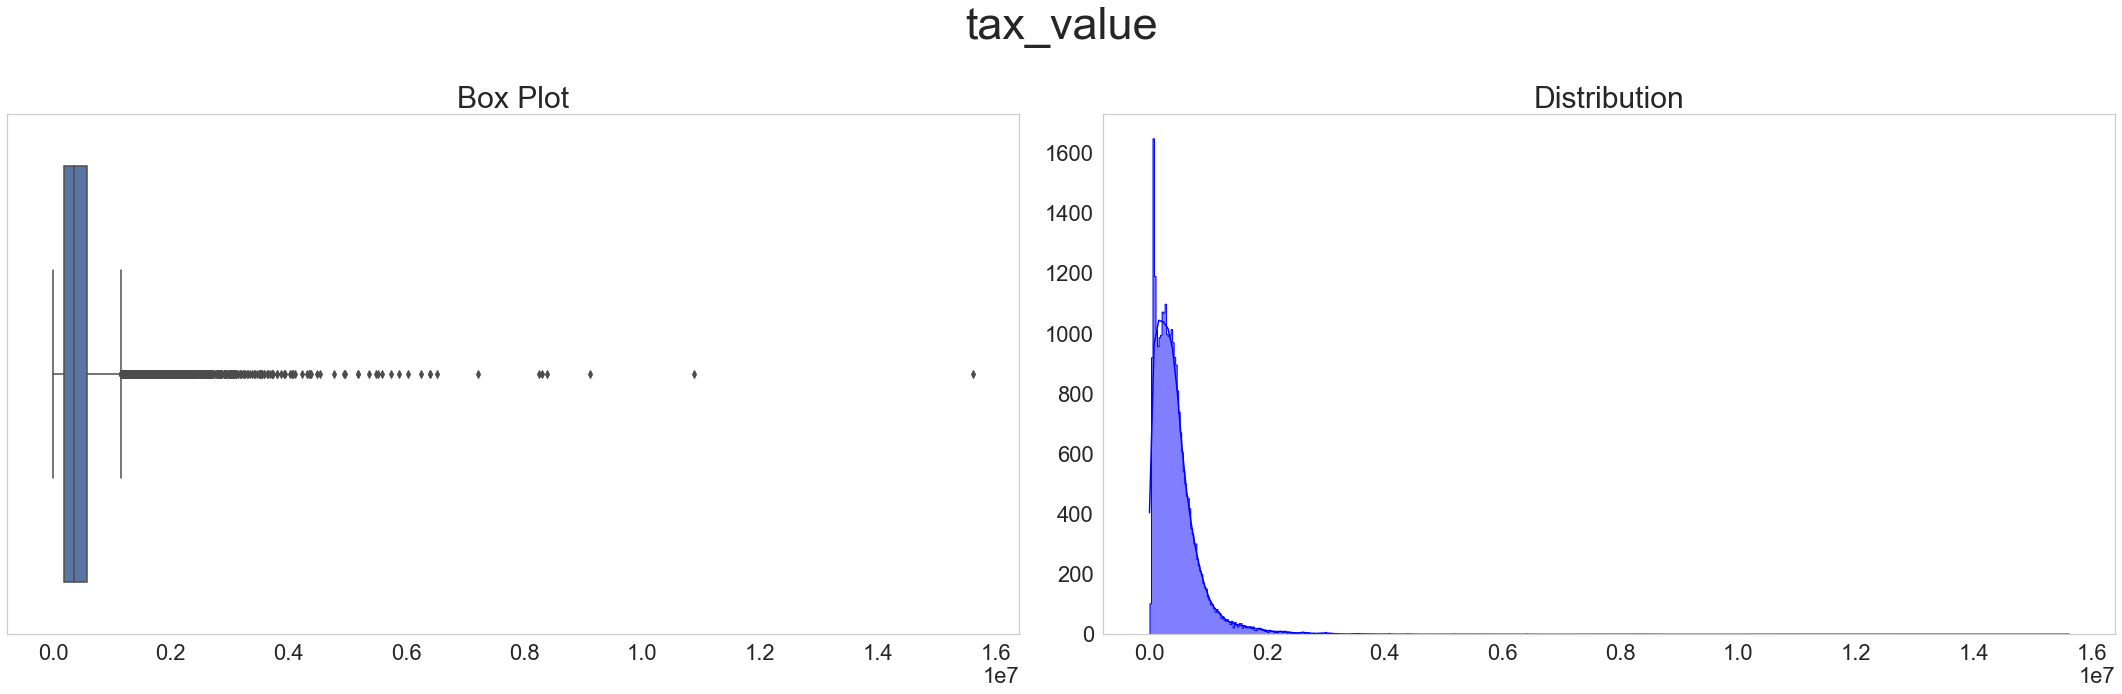

Summary Statistics for tax_value
count    2.779800e+04
mean     4.524594e+05
std      4.489882e+05
min      3.254000e+03
25%      1.861218e+05
50%      3.576760e+05
75%      5.750000e+05
max      1.561849e+07
Name: tax_value, dtype: float64


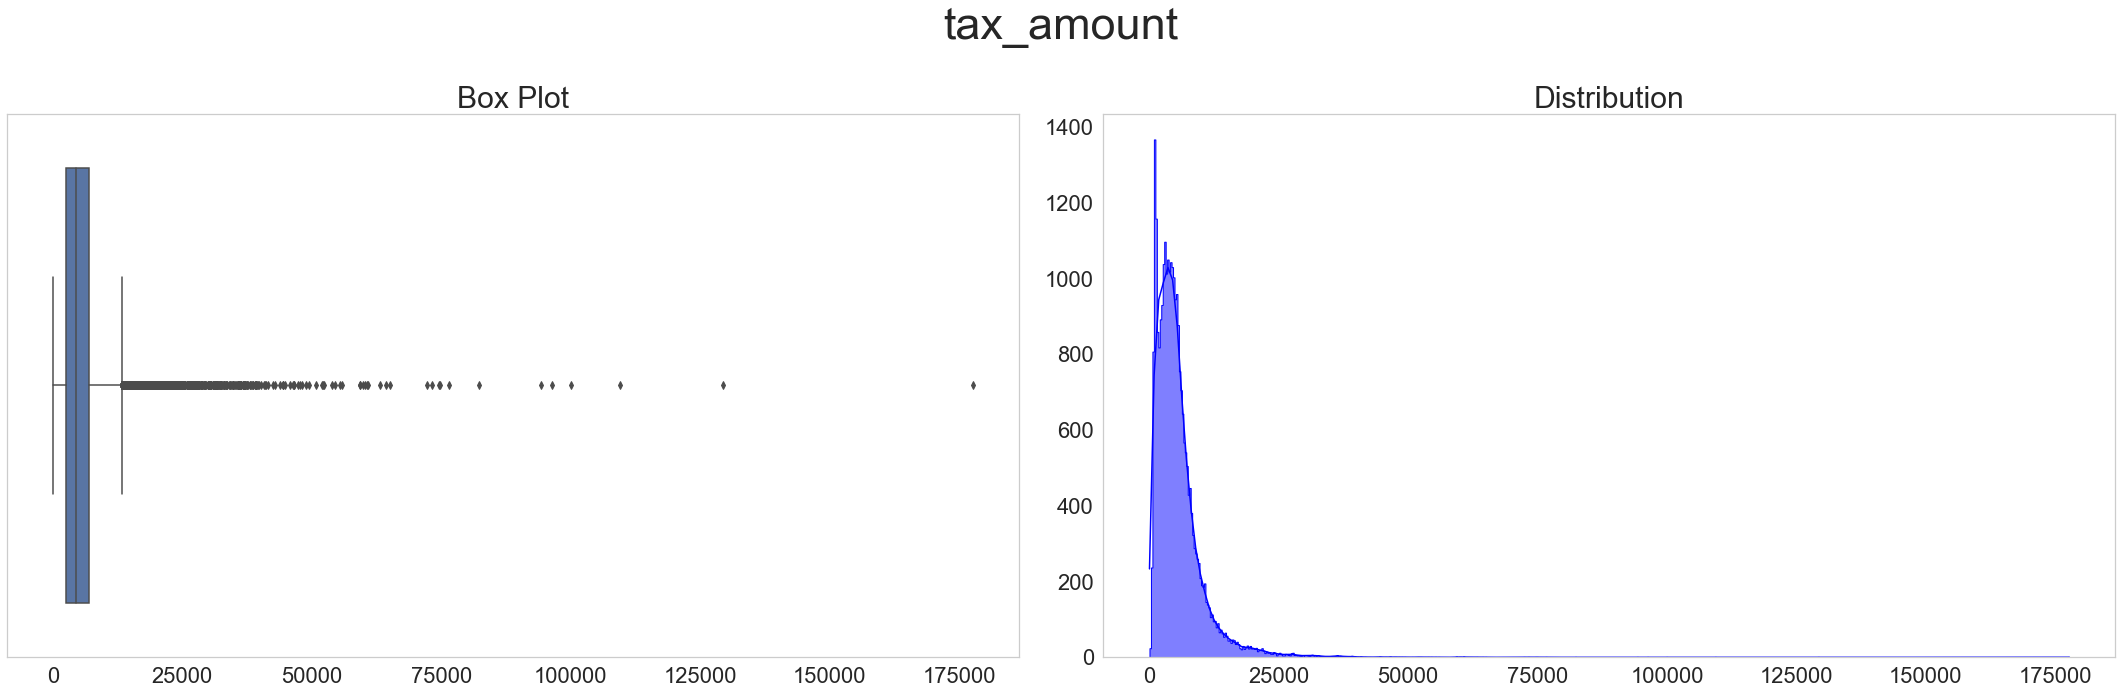

Summary Statistics for tax_amount
count     27798.000000
mean       5550.347738
std        5195.486416
min          49.180000
25%        2569.152500
50%        4464.095000
75%        6881.767500
max      177740.850000
Name: tax_amount, dtype: float64


In [18]:
univariate_fea = ['sqft','age','bathsandbeds','structure_dollar_per_sqft','tax_value','tax_amount']

for i in univariate_fea:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

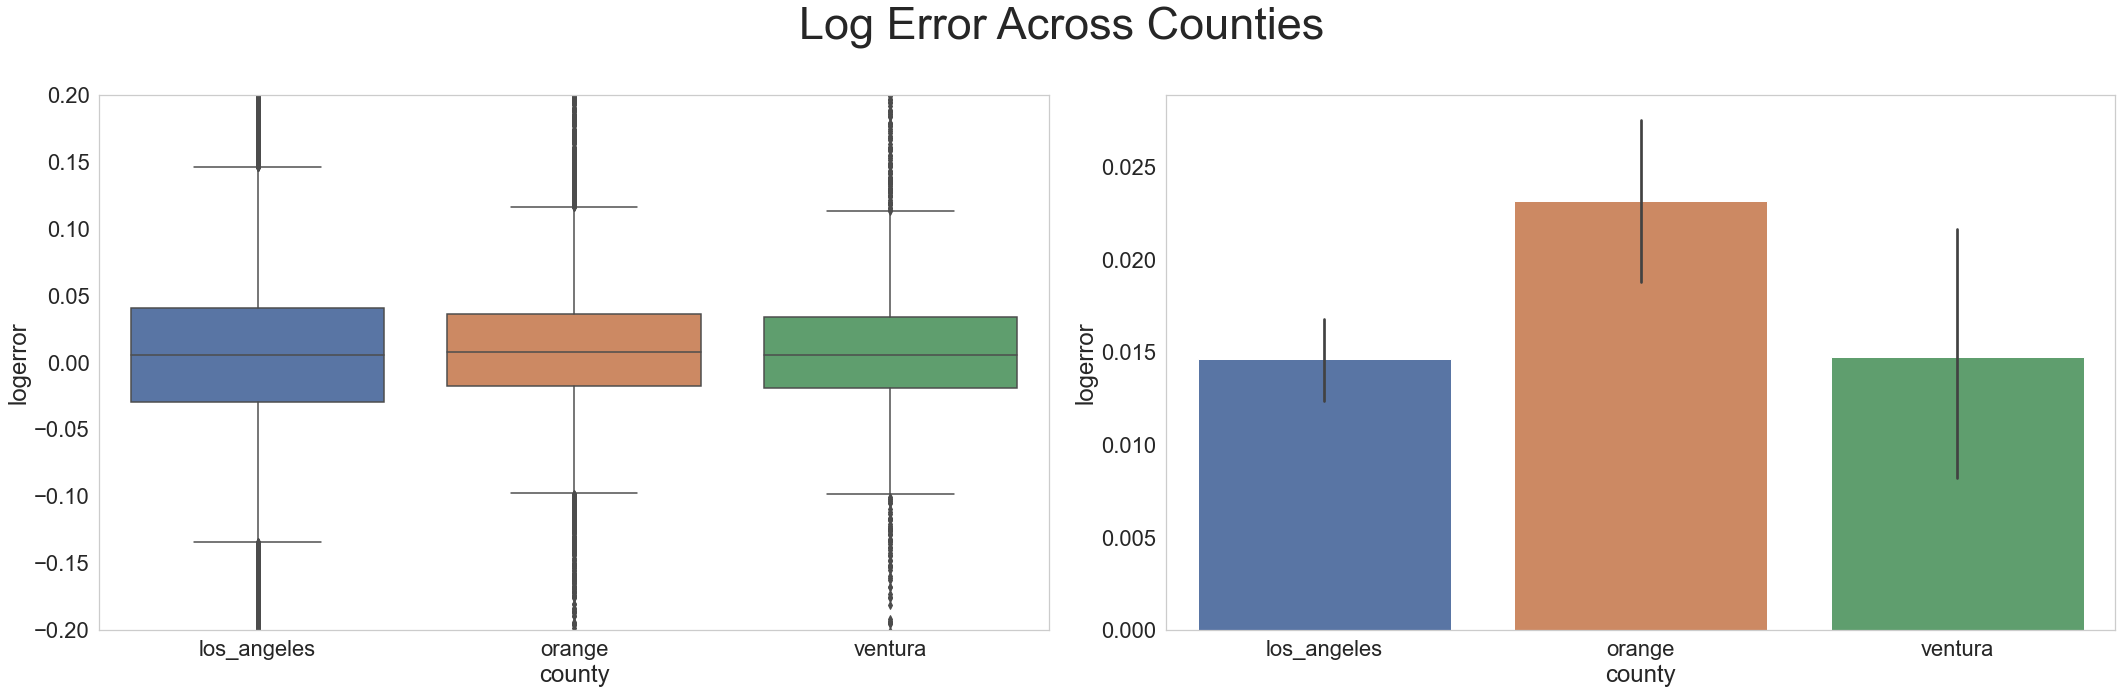

In [20]:
#logerror across counties (LA, Orange, and Ventura)
#Bivariate Exploration

#set up figure size, font size, and turn off grid.
plt.figure(figsize=(30,10))
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})

#boxplot
plt.subplot(1, 2, 1)
sns.boxplot(train.county, train.logerror)
plt.ylim(-.2, .2)

#barplot
plt.subplot(1, 2, 2)
sns.barplot(data=train, x='county',y='logerror')

#title
plt.suptitle('Log Error Across Counties', fontsize = 45)
plt.tight_layout()
plt.show()

In [21]:
null_hypothesis = "no difference in logerror between orange county and the other counties"
alternative_hypothesis = "there is a difference in log error between orange county and other counties"
a = 0.05 #a for alpha 

orange_logerror=train[train.county=='orange'].logerror
other_logerror = train[train.county!='orange'].logerror
t, p = stats.ttest_ind(orange_logerror, other_logerror)

if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: no difference in logerror between orange county and the other counties
There is evidence to suggest: there is a difference in log error between orange county and other counties


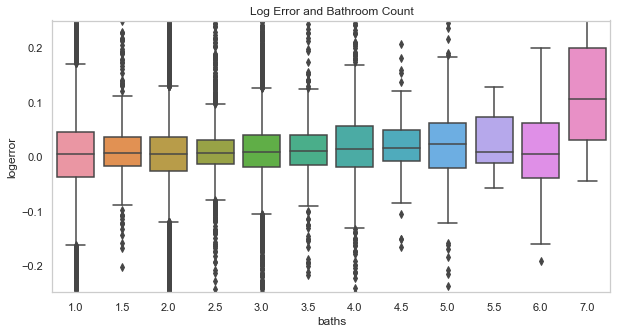

In [22]:
#Log error and number of bathrooms
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(train.baths, train.logerror)
plt.title('Log Error and Bathroom Count')
plt.ylim(-.25, .25)
plt.show()

In [23]:
null_hypothesis = "no difference in logerror between properties with 3 bathrooms or less, or more bathrooms"
alternative_hypothesis = "there is a difference in logerror between properties with 3 bathrooms or less, or more bathrooms"
a = 0.05 #a for alpha 

three_or_less_baths=train[train.baths<=3].logerror
more_than_three_baths = train[train.baths>3].logerror
t, p = stats.ttest_ind(three_or_less_baths, more_than_three_baths)

if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: no difference in logerror between properties with 3 bathrooms or less, or more bathrooms
There is evidence to suggest: there is a difference in logerror between properties with 3 bathrooms or less, or more bathrooms


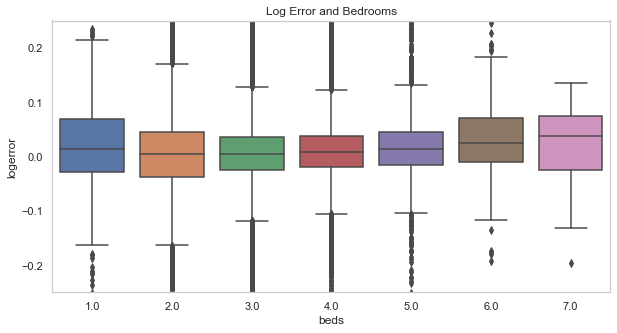

In [24]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(train.beds, train.logerror)
plt.title('Log Error and Bedrooms')
plt.ylim(-.25, .25)
plt.show()

In [26]:
stats.levene(train[train.baths<=2000].logerror, train[train.baths>2000].logerror)

LeveneResult(statistic=nan, pvalue=nan)

In [28]:
stats.ttest_ind(train[train.baths<=2.5].logerror, train[train.baths>2.5].logerror)

Ttest_indResult(statistic=-2.077630819325224, pvalue=0.03775253288795169)

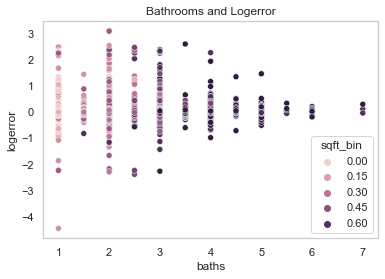

In [29]:
sns.scatterplot(x='baths',y='logerror',data=train,hue='sqft_bin')
plt.title('Bathrooms and Logerror')
plt.show()